In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
students = pd.read_csv('../data/P87-S6-Merging-Resources/students.csv')
teachers =  pd.read_csv('../data/P87-S6-Merging-Resources/teachers.csv')
grades1 = pd.read_csv('../data/P87-S6-Merging-Resources/grades1.csv')
grades2 = pd.read_csv('../data/P87-S6-Merging-Resources/grades2.csv')
contact = pd.read_csv('../data/P87-S6-Merging-Resources/contact.csv')

In [123]:
print(students.head(2))
print('\n')
print(teachers.head(2))
print('\n')
print(grades1.head(2))
print('\n')
print(grades2.head(2))
print('\n')
print(contact.head(2))


      id firstname lastname
0  34292    Joshua    Davis
1  34293     Karen   Flores


    course        teacher
0  PHYS101   Wayne Walker
1  CHEM101  Albert Taylor


   student_id   course grade
0       34292  ENGL101     A
1       34293  ENGL101     A


   student_id   course grade
0       34302  DRAM101     F
1       34303  DRAM101     D


   student_id parent_contact           phone
0       34292   Samuel Davis  (356) 849-0352
1       34293   Laura Flores  (477) 325-7117


In [157]:
display(students.head(2), teachers.head(2), grades1.head(2))

,student_id,firstname,lastname
0,34292,Joshua,Davis
1,34293,Karen,Flores


,course,teacher
0,PHYS101,Wayne Walker
1,CHEM101,Albert Taylor


,student_id,course,grade,semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1


In [124]:
grades1["semester"] = 1
grades2["semester"] = 2
grades =pd.concat([grades1, grades2])
grades

,student_id,course,grade,semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1
...,...,...,...,...
60,34312,DESN101,E,2
61,34313,DESN101,D,2
62,34314,DESN101,A,2
63,34315,DESN101,A,2


##### We have to reset index since when we concatinate the data frames we will have DUPLICATED INDEX!

In [125]:
grades.reset_index(inplace=True, drop=True)
grades

,student_id,course,grade,semester
0,34292,ENGL101,A,1
1,34293,ENGL101,A,1
2,34294,ENGL101,C,1
3,34295,ENGL101,C,1
4,34296,ENGL101,C,1
...,...,...,...,...
185,34312,DESN101,E,2
186,34313,DESN101,D,2
187,34314,DESN101,A,2
188,34315,DESN101,A,2


In [126]:
student_grades = pd.merge(students, grades, left_on='id', right_on='student_id')
student_grades.head(2)

,id,firstname,lastname,student_id,course,grade,semester
0,34292,Joshua,Davis,34292,ENGL101,A,1
1,34292,Joshua,Davis,34292,MATH101,A,1


In [127]:
students.rename({'id':'student_id'}, axis=1, inplace=True)

In [128]:
student_full = pd.merge(students, contact, on='student_id')
student_full.head()

,student_id,firstname,lastname,parent_contact,phone
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352
1,34293,Karen,Flores,Laura Flores,(477) 325-7117
2,34294,Julia,Walker,Eric Walker,(871) 639-0797
3,34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107
4,34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113


In [129]:
student_full_grades = pd.merge(student_full, grades, on='student_id' )
student_full_grades.head()

,student_id,firstname,lastname,parent_contact,phone,course,grade,semester
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,ENGL101,A,1
1,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,MATH101,A,1
2,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,PHYS101,D,1
3,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,MATH102,F,1
4,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,COMP101,A,1


In [130]:
full = pd.merge(student_full_grades, teachers,on='course' )
full.head()

,student_id,firstname,lastname,parent_contact,phone,course,grade,semester,teacher
0,34292,Joshua,Davis,Samuel Davis,(356) 849-0352,ENGL101,A,1,Ernest Green
1,34293,Karen,Flores,Laura Flores,(477) 325-7117,ENGL101,A,1,Ernest Green
2,34294,Julia,Walker,Eric Walker,(871) 639-0797,ENGL101,C,1,Ernest Green
3,34295,Cynthia,Robinson,Chris Robinson,(574) 683-2107,ENGL101,C,1,Ernest Green
4,34296,Bonnie,Hall,Dorothy Hall,(384) 293-2113,ENGL101,C,1,Ernest Green


#### which student's failing more than two classes?


In [155]:
mask = (grades[grades['grade'].isin(['E','F'])].groupby('student_id')['grade'].count() > 2).reset_index()
mask = mask[mask.grade ==True].student_id
student_full[student_full.student_id.isin(mask)]

,student_id,firstname,lastname,parent_contact,phone
7,34300.0,Heather,Miller,Annie Miller,(864) 583-9615
9,34302.0,Carlos,Ross,Debra Ross,(592) 663-4425
10,34303.0,Dorothy,Green,Russell Green,(749) 344-5744
11,34304.0,Joan,Wood,Walter Wood,(457) 429-8627
13,34306.0,Nancy,Turner,Barbara Turner,(908) 350-9105
15,34308.0,Gregory,Gonzales,Sara Gonzales,(588) 469-9488
16,34309.0,Shawn,Rivera,Joseph Rivera,(759) 260-4879
18,34311.0,William,Sanders,Ruth Sanders,(249) 216-0443
19,34312.0,Barbara,Peterson,James Peterson,(584) 827-4997
20,34313.0,Douglas,Cook,Jimmy Cook,(364) 231-5641


In [165]:
desn = grades1[grades1.course == 'DESN101']

In [177]:
desn_st = pd.merge(students, desn, left_on='student_id', right_on='student_id', how='inner')
print(desn_st.shape)
desn_st.head()

(12, 6)


,student_id,firstname,lastname,course,grade,semester
0,34295,Cynthia,Robinson,DESN101,C,1
1,34296,Bonnie,Hall,DESN101,C,1
2,34297,Gary Lee,Lee,DESN101,A,1
3,34308,Shawn,Rivera,DESN101,E,1
4,34309,Lois,James,DESN101,B,1


In [178]:
desn_st = pd.merge(students, desn, left_on='student_id', right_on='student_id', how='left')
print(desn_st.shape)
desn_st.head()

(25, 6)


,student_id,firstname,lastname,course,grade,semester
0,34292,Joshua,Davis,NaN,NaN,NaN
1,34293,Karen,Flores,NaN,NaN,NaN
2,34294,Julia,Walker,NaN,NaN,NaN
3,34295,Cynthia,Robinson,DESN101,C,1.0
4,34296,Bonnie,Hall,DESN101,C,1.0


In [179]:
df_a = pd.DataFrame({"A":['x','y','z'], 'B':[1,2,3]})
df_b = pd.DataFrame({"A":['u','v','x'], 'B':[4.0,5.0,6.0]})
display(df_a, df_b)

,A,B
0,x,1
1,y,2
2,z,3


,A,B
0,u,4.0
1,v,5.0
2,x,6.0


In [182]:
df_c = pd.merge(df_a, df_b, on='A', how='inner')
df_d = pd.merge(df_a, df_b, on='A', how='left')
df_e = pd.merge(df_a, df_b, on='A', how="outer")
display(df_c, df_d, df_e)

,A,B_x,B_y
0,x,1,6.0


,A,B_x,B_y
0,x,1,6.0
1,y,2,NaN
2,z,3,NaN


,A,B_x,B_y
0,x,1.0,6.0
1,y,2.0,NaN
2,z,3.0,NaN
3,u,NaN,4.0
4,v,NaN,5.0


In [237]:
fee = pd.DataFrame({'year':[2000, 2000, 2001, 2001],
                     'sem': [1, 2 ,1, 2],
                     'fee': [200, 200, 200, 300]
                     })
scholar = pd.DataFrame({'year': [2000, 2000, 2001, 2001],
                     'sem': [1, 2, 1, 2],
                     'student': [1, 2, 2, 3],
                     'discount': [0.1, 0.2, 0.2, 1]})
students = pd.DataFrame({'student': list(range(1,6))})

In [218]:
display(fee, scholar, students)

,year,sem,fee
0,2000,1,200
1,2000,2,200
2,2001,1,200
3,2001,2,300


,year,sem,student,discount
0,2000,1,1,0.1
1,2000,2,2,0.2
2,2001,1,2,0.2
3,2001,2,3,1.0


,student
0,1
1,2
2,3
3,4
4,5


In [219]:
scholar_fee = pd.merge(fee, scholar, on=['year', 'sem'])
scholar_fee

,year,sem,fee,student,discount
0,2000,1,200,1,0.1
1,2000,2,200,2,0.2
2,2001,1,200,2,0.2
3,2001,2,300,3,1.0


In [234]:
normal_st_fee = pd.merge(students, scholar_fee, how='cross').drop("student_y", axis=1)
normal_st_fee.head()

,student_x,year,sem,fee,discount
0,1,2000,1,200,0.1
1,1,2000,2,200,0.2
2,1,2001,1,200,0.2
3,1,2001,2,300,1.0
4,2,2000,1,200,0.1


In [235]:
student_fees = pd.merge(students, fee, how='cross')
student_fees.head()

,student,year,sem,fee
0,1,2000,1,200
1,1,2000,2,200
2,1,2001,1,200
3,1,2001,2,300
4,2,2000,1,200


In [236]:
df =pd.merge(student_fees, scholar, on=["student", "year", "sem"], how='left').fillna(0)
df['discounted_fee'] = df['fee'] * (1- df['discount'])
df.groupby('student')['discounted_fee'].sum().reset_index()

,student,discounted_fee
0,1,880.0
1,2,820.0
2,3,600.0
3,4,900.0
4,5,900.0


In [249]:
students['key'], scholar_fee['key'] = 1, 1
st = pd.merge(students, scholar_fee, on='key').drop(columns=['key', 'student_y'], axis=1).rename(columns={'student_x':'student'})
st

,student,year,sem,fee,discount
0,1,2000,1,200,0.1
1,1,2000,2,200,0.2
2,1,2001,1,200,0.2
3,1,2001,2,300,1.0
4,2,2000,1,200,0.1
5,2,2000,2,200,0.2
6,2,2001,1,200,0.2
7,2,2001,2,300,1.0
8,3,2000,1,200,0.1
9,3,2000,2,200,0.2


In [261]:
df_aus = pd.read_csv('../data/P87-S6-Merging-Resources/aus.csv', parse_dates=['date'], dayfirst=True)
df_bri = pd.read_csv('../data/P87-S6-Merging-Resources/brisbane.csv', parse_dates=['date'], dayfirst=True)
df_usa = pd.read_csv('../data/P87-S6-Merging-Resources/usa.csv', parse_dates=['date'], dayfirst=True)

In [262]:
display(df_aus.head(2), df_usa.head(2), df_bri.head(2))

,date,temperature
0,2000-01-20,30.6
1,2001-01-20,32.7


,date,temperature
0,2000-03-01,15.25
1,2000-09-01,15.77


,date,temperature
0,2000-01-01,30.15
1,2000-01-08,30.31


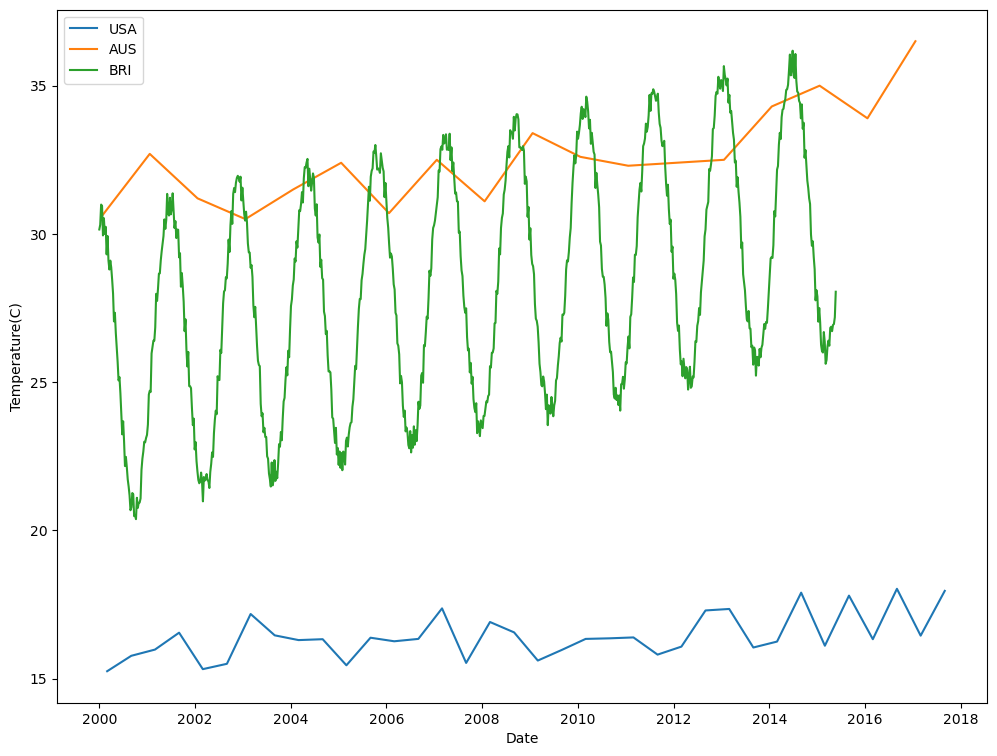

In [269]:
plt.figure(figsize=(12,9))
plt.plot(df_usa.date, df_usa.temperature, label="USA")
plt.plot(df_aus.date, df_aus.temperature, label="AUS")
plt.plot(df_bri.date, df_bri.temperature, label="BRI")
plt.xlabel('Date')
plt.ylabel('Temperature(C)')
plt.legend();

In [285]:
df_aus_usa = pd.merge_ordered(df_aus, df_usa, on='date', how='outer', fill_method='ffill').rename(columns={'temperature_x':'temperature_AUS', 'temperature_y':'temperature_USA'})
df_aus_usa.head()

,date,temperature_AUS,temperature_USA
0,2000-01-20,30.6,NaN
1,2000-03-01,30.6,15.25
2,2000-09-01,30.6,15.77
3,2001-01-20,32.7,15.77
4,2001-03-01,32.7,15.98
